In [2]:
!pip install peft -q
!pip install diffusers -q
!pip install diffusers transformers accelerate --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 2.7 MB/s eta 0:00:0000:0100:01m
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.30.1
    Uninstalling accelerate-0.30.1:
      Successfully uninstalled accelerate-0.30.1


In [3]:
import peft
import transformers
from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

2024-06-15 22:31:50.470786: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-15 22:31:50.470886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-15 22:31:50.629215: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_

In [4]:
def plot_images(pipe, prompt, n):
    images = []
    for _ in range(n):
        image = pipe(prompt).images[0]
        images.append(image)

    fig, axes = plt.subplots(1, n, figsize=(4*n, 6))
    for ax, img in zip(axes, images):
        ax.imshow(img)
        ax.axis('off')
    plt.show()

# color

In [6]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe1 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = torch.float16).to('cuda:0')
pipe1.load_lora_weights("/kaggle/input/lct-dataset/4v/GAZPROM_lora_blue_orange.safetensors")

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

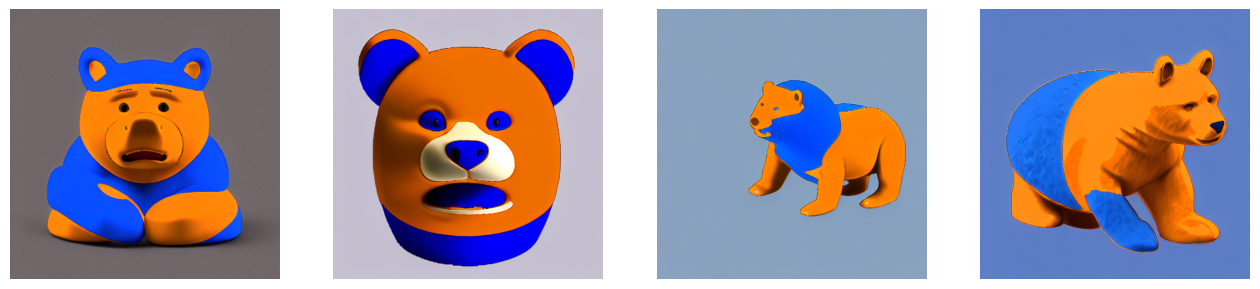

In [23]:
pipe1.safety_checker = None
pipe1.requires_safety_checker = False
prompt = "orange and blue bear isometric,claymorphism,3d render,icon,web icon,clean background"
plot_images(pipe1, prompt, 4)

# best lora

In [16]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe2 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = torch.float16).to('cuda:0')
pipe2.load_lora_weights("/kaggle/input/lct-dataset/GAZPROM_850_photo-000014.safetensors")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

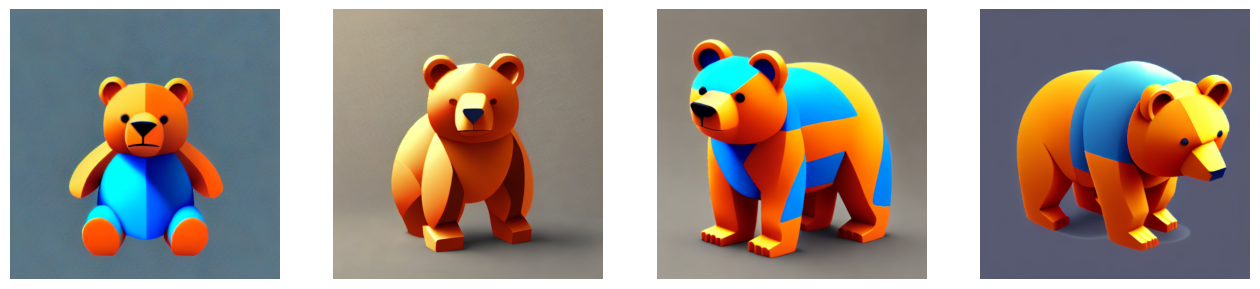

In [28]:
prompt = "orange and blue bear isometric,claymorphism,3d render,icon,web icon,clean background"
plot_images(pipe2, prompt, 4)

# color+best

In [19]:
model_id = "runwayml/stable-diffusion-v1-5"
pipe3 = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype = torch.float16).to('cuda:1')

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [20]:
pipe3.load_lora_weights("/kaggle/input/lct-dataset/GAZPROM_850_photo-000014.safetensors", adapter_name = "LCT")
pipe3.load_lora_weights("/kaggle/input/lct-dataset/4v/GAZPROM_lora_blue_orange.safetensors", adapter_name = "color")
pipe3.set_adapters(["LCT","color"], adapter_weights = [0.5, 0.5])

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

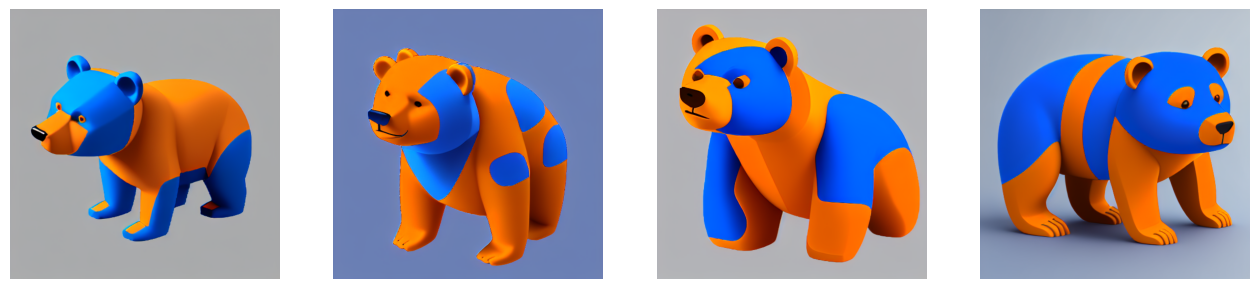

In [29]:
prompt = "orange and blue bear isometric,claymorphism,3d render,icon,web icon,clean background"
plot_images(pipe3, prompt, 4)